In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
#Read the dataset
df = pd.read_excel(r'C:\Users\Paris\OneDrive\Desktop\Concordia\analytics\case study1\IMB881 (1).xlsx', sheet_name='Data for Clustering')

df.shape

(45, 14)

In [4]:
df.head()

,Row Labels,Sum of QtyRequired,Sum of TotalArea,Sum of Amount,DURRY,HANDLOOM,DOUBLE BACK,JACQUARD,HAND TUFTED,HAND WOVEN,KNOTTED,GUN TUFTED,Powerloom Jacquard,INDO TEBETAN
0,A-11,2466,139.5900,1.854041e+05,1021,1445,0,0,0,0,0,0,0,0
1,A-6,131,2086.0000,6.247460e+03,0,0,25,106,0,0,0,0,0,0
2,A-9,18923,53625.6544,1.592080e+06,3585,0,175,714,11716,2116,617,0,0,0
3,B-2,624,202.8987,1.481116e+04,581,0,0,2,0,41,0,0,0,0
4,B-3,464,8451.5625,5.862687e+04,0,0,459,5,0,0,0,0,0,0


C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Row Labels  Sum of QtyRequired  Sum of TotalArea  Sum of Amount   DURRY  \
0        A-11                2466          139.5900   1.854041e+05    1021   
1         A-6                 131         2086.0000   6.247460e+03       0   
2         A-9               18923        53625.6544   1.592080e+06    3585   
3         B-2                 624          202.8987   1.481116e+04     581   
4         B-3                 464         8451.5625   5.862687e+04       0   
5         B-4                 692         3244.2500   2.624250e+04      80   
6         C-1                5137        62763.0555   5.676207e+05     288   
7         C-2               55172         9510.0000   1.557123e+06   37042   
8         C-3                1566         4016.0000   9.906235e+04    1240   
9          CC                5077         7695.9930   1.475740e+05       4   
10        CTS                 565          420.0000   2.380000e+04       0   
11         DR                 149          305.9765   2.864812e+

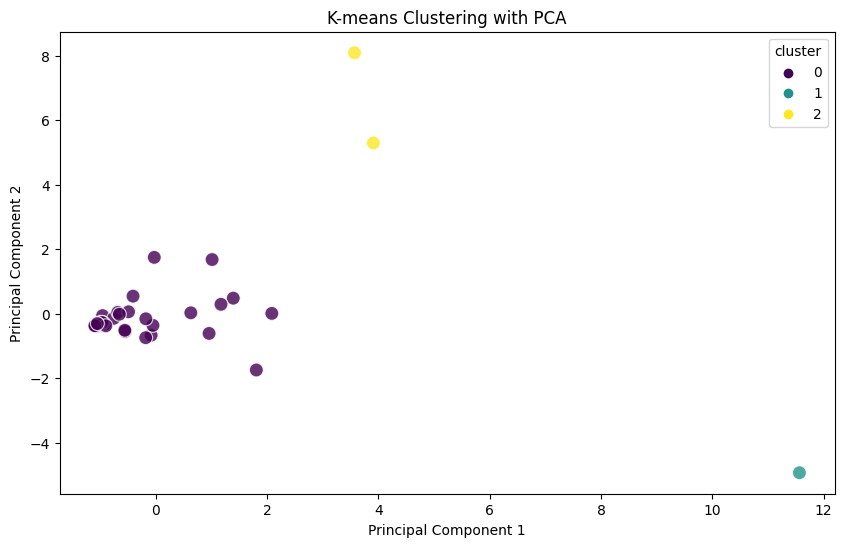

In [5]:
# Extract relevant numerical columns
numerical_columns = df.columns[1:]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

# Choose the number of clusters (k)
k = 3

# Explicitly set n_init to suppress the FutureWarning
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Avoid memory leak warning on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'

# Apply K-means clustering
df['cluster'] = kmeans.fit_predict(df_scaled)

# Display the resulting DataFrame with cluster assignments
print(df)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Display the resulting DataFrame with cluster assignments
print(df)

# Visualize the results using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

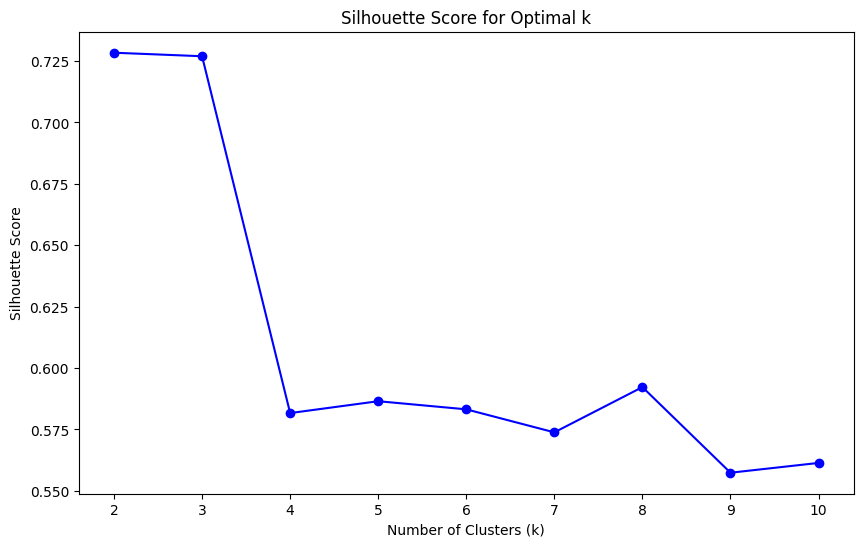

The optimal number of clusters (k) based on silhouette score: 2


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Extract relevant numerical columns
numerical_columns = df.columns[1:]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

# Choose a range of k values to test
k_values = range(2, 11)  # You can adjust the range as needed

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Calculate silhouette score for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_values)
plt.show()

# Find the optimal k with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters (k) based on silhouette score: {optimal_k}")


C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

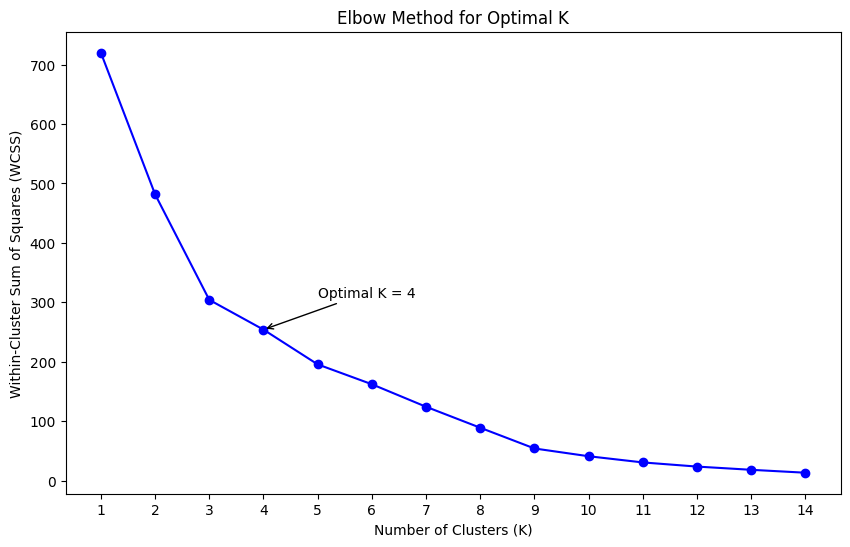

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace 'df' with your DataFrame containing the data
# Select only numerical columns for clustering
numerical_columns = df.select_dtypes(include=[np.number])

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_columns)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Choose a range of K values to test
k_values = range(1, 15)  # Adjust the range as needed

# Calculate WCSS for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)

# Finding the optimal K (elbow point)
delta_wcss = np.diff(wcss, 2)
optimal_k = k_values[np.argmin(delta_wcss) + 1]

# Annotate the optimal K value on the plot
plt.annotate(f'Optimal K = {optimal_k}', xy=(optimal_k, wcss[optimal_k - 1]),
             xytext=(optimal_k + 1, wcss[optimal_k - 1] + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left', verticalalignment='bottom')

plt.show()


C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


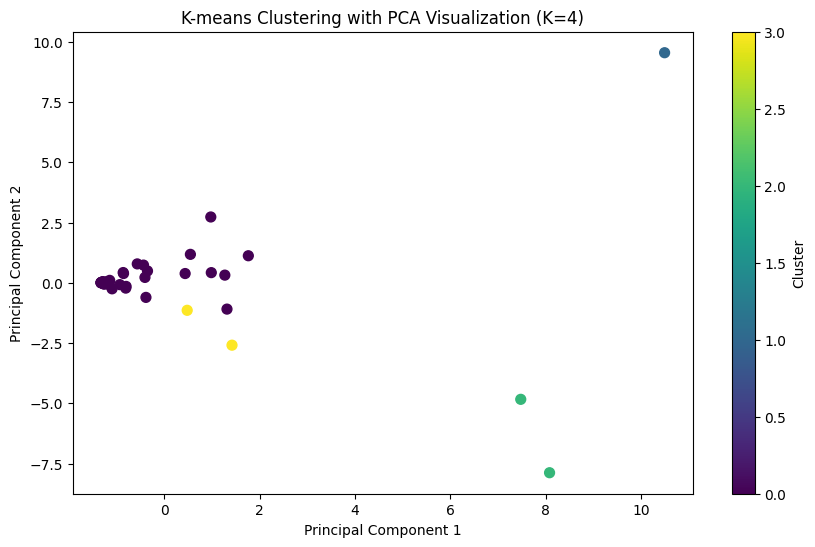

In [10]:

# Replace 'df' with your DataFrame containing the data
# Select only numerical columns for clustering
numerical_columns = df.select_dtypes(include=[np.number])

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_columns)

# Perform K-means clustering with K=7
kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(data_scaled)

# Adding cluster labels to the original DataFrame
df['Cluster'] = clusters

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Concatenate PCA DataFrame with cluster labels
final_df = pd.concat([pca_df, df['Cluster']], axis=1)

# Visualization using scatter plot with PCA components
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PCA1'], final_df['PCA2'], c=final_df['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering with PCA Visualization (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


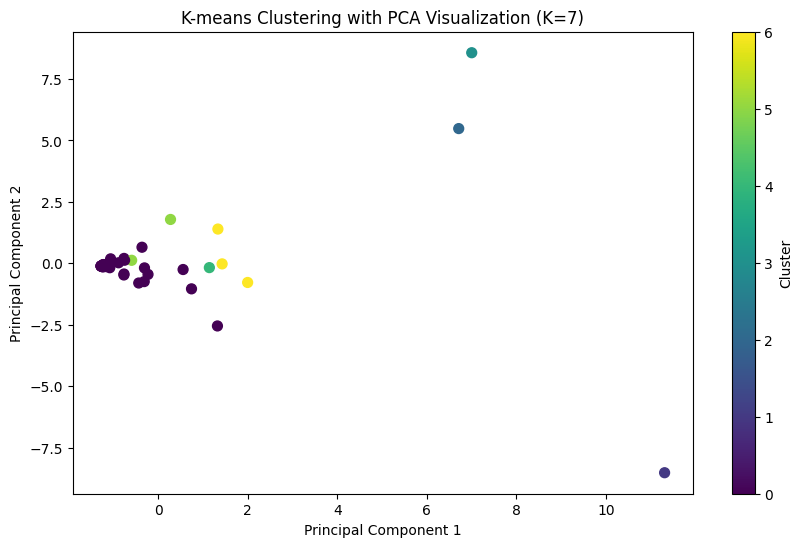

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Replace 'df' with your DataFrame containing the data
# Select only numerical columns for clustering
numerical_columns = df.select_dtypes(include=[np.number])

# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_columns)

# Perform K-means clustering with K=7
kmeans = KMeans(n_clusters=7, random_state=1)
clusters = kmeans.fit_predict(data_scaled)

# Adding cluster labels to the original DataFrame
df['Cluster'] = clusters

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Concatenate PCA DataFrame with cluster labels
final_df = pd.concat([pca_df, df['Cluster']], axis=1)

# Visualization using scatter plot with PCA components
plt.figure(figsize=(10, 6))
plt.scatter(final_df['PCA1'], final_df['PCA2'], c=final_df['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering with PCA Visualization (K=7)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
